# Projekt: Čokolada

## Opis projekta
Za projekt sem si izbrala analizo čokoladnih ovitkov, ki sem jih zbrala v preteklih letih. Podatki o čokoladah so:
* proizvajalec,
* zbirka,
* podzbirka,
* ime,
* zaporedna številka,
* barva.

Primer: Pri temni čokoladi Lindt z meto je proizvajalec Lindt & Sprűngli, zbirka Excellence, podzbirka Fin Cœur, ime Mint Intense Dark, zaporedna številka 5, ker je bila 5. po vrsti, od kar sem jih začela zbirati, barva pa Dark (temna čokolada).
Analizirali bomo število čokolad posameznega proizvajalca v zbirki, število čokolad posamezne vrste (bela, mlečna, temna).

## Hipoteze
* Največ čokolad je od proizvajalca Lindt & Sprűngli,
* večina proizvajalcev ima manj kot 5 čokolad,
* barva čokolade se po obdobjih spreminja (obdobje je 50 čokolad),
* največ je mlečnih čokolad.

## Uvod
Najprej si oglejmo tabelo, v kateri so zbrani vsi podatki.

In [5]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

cokolade = pd.read_csv('nove_cokolade_barva.csv', sep = "|")

In [6]:
cokolade

,Proizvajalec,Zbirka,Podzbirka,Ime,Stevilka,Barva
0,1848,NaN,NaN,Blanc Noisettes à la Crème de Nougat et Nougatine,130,White
1,Alter Eco Bio & Equitable,NaN,NaN,Lait aux Éclats de Miel,250,Milk
2,Alter Eco Bio & Equitable,NaN,NaN,Lait Éclats d'Amandes Caramélisés,210,Milk
3,Arko Confiserie,NaN,NaN,Papua 35%,366,Unknown
4,Auchan,Blanc,NaN,Noix de Coco Caramélisée,121,White
...,...,...,...,...,...,...
440,Wagner,NaN,NaN,Earl Grey,296,Unknown
441,Wagner,NaN,NaN,Fragaria,282,Unknown
442,Wagner,NaN,NaN,Montélimar,334,Unknown
443,Wagner,NaN,NaN,Sanddorn Orange,336,Unknown


## Proizvajalci
Začnimo kar s prvo hipotezo; poglejmo si, koliko čokolad posameznega proizvajalca je v zbirki.

In [7]:
zastopanost_proizvajalcev = cokolade.groupby('Proizvajalec').size().reset_index(name='Kolicina')
zastopanost_proizvajalcev.sort_values('Kolicina', ascending = False)

,Proizvajalec,Kolicina
35,Lindt & Sprüngli,141
41,Milka,17
17,Côte d'Or,16
59,Tablette d'Or,15
23,Frey,15
...,...,...
30,K Plus,1
16,Cémoi (Chocolatier Français),1
24,Galler Chocolatier,1
19,Elysia,1


Oglejmo si še graf, ki prikazuje zastopanost proizvajalcev.

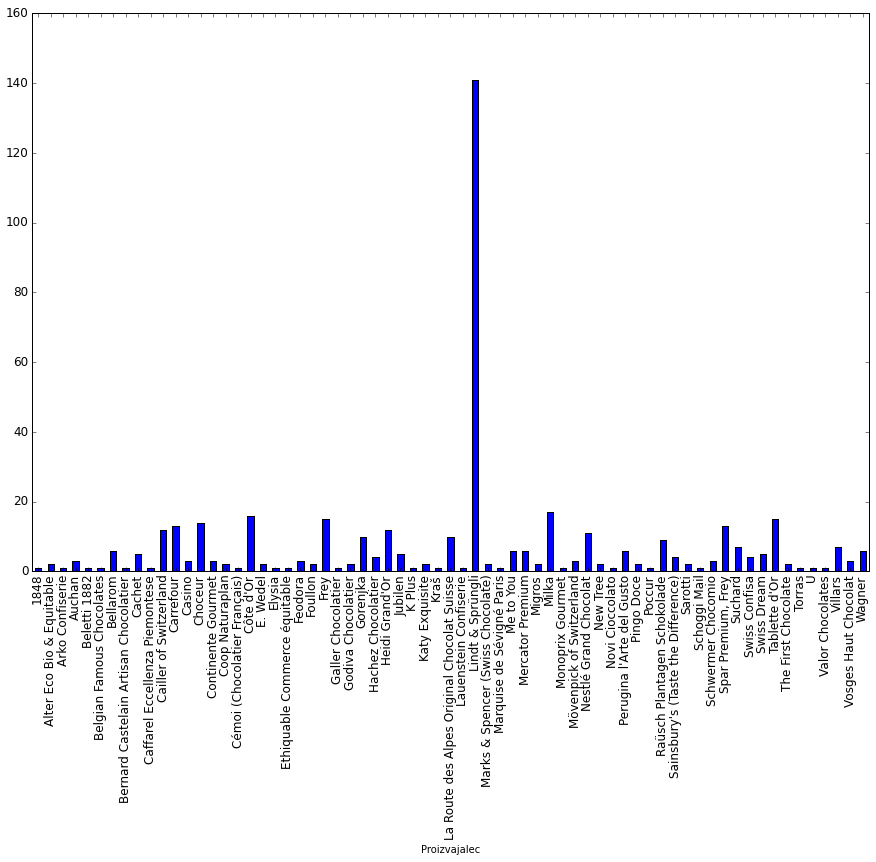

In [8]:
cokolade.groupby('Proizvajalec').size().plot(kind='bar', figsize=(15, 10), fontsize=12)

Vidimo, da je največ čokolad proizvajalca Lindt & Sprüngli (141), nato Milka (17) in še Côte d'Or (16), s čimer je prva hipoteza potrjena.

## Barva čokolade
Čokolado lahko ločimo po procentu kakava, ki ga vsebuje; bela ne vsebuje kakavovega prahu, mlečna ga ima vsaj 25%, temna pa vsaj 50%.

In [22]:
barva_cokolade = cokolade.groupby('Barva').size()
barva_cokolade

Barva
Dark        93
Milk       113
Unknown    203
White       36
dtype: int64

Očinto je, kot smo napovedali, da je mlečnih čokolad daleč največ, sledijo jim temne, najmanj pa je belih. Potrebno pa je vedeti, da rezultat ni točen, ker smo barvo čokolad avtomatično določili s programom, ki je prebral njihovo ime. To pomeni, da za čokolade, ki barve nimajo omenjene v imenu, nimamo podatka, kakšne so. Zato smo lahko pri analizi upoštevali le dobro polovico vseh ovitkov.

In [15]:
lindt = cokolade[cokolade['Proizvajalec'] == 'Lindt & Sprüngli'].groupby('Barva').size()
lindt

Barva
Dark       33
Milk       19
Unknown    77
White      12
dtype: int64

Zanimivo pa je, da je pri najbolj zastopanem proizvajalcu večina čokolad (33) temnih.

Spodnji graf nam prikazuje, koliko čokolad posamezne barve je od različnih proizvajalcev.

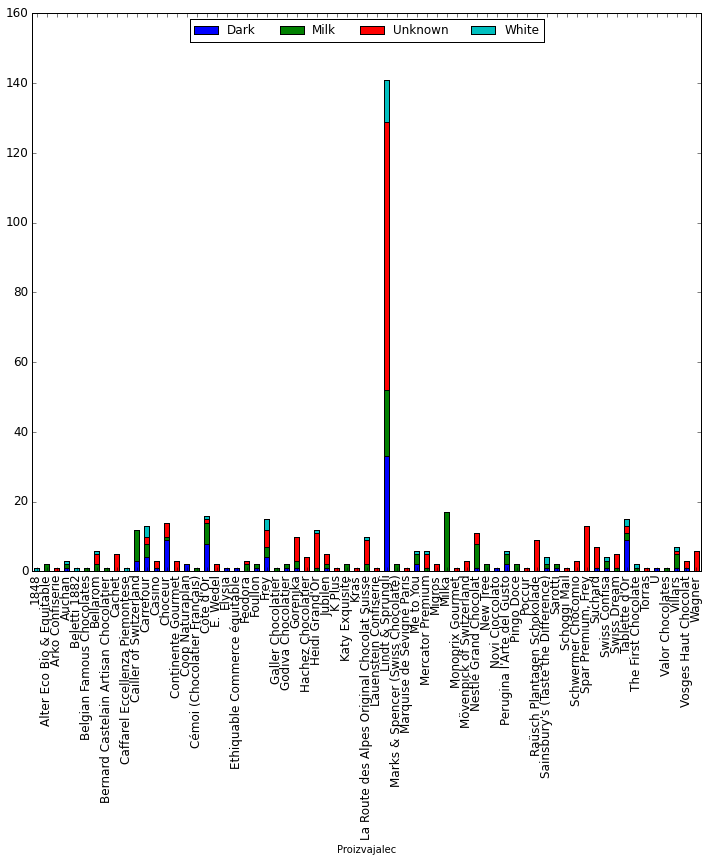

In [16]:
graf = cokolade.groupby(['Proizvajalec', 'Barva']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 10), fontsize=12)
graf.legend(loc=9, ncol=8)

Kot vidimo, pri različnih proizvajalcih prevladujejo različne barve čokolade; tako ima npr. Lindt največ temnih, Milka pa največ mlečnih.

'Stevilka' posamezne čokolade pove, katera po vrsti je čokolada v zbirki (1 je bila prva). Tako lahko, če ovitke razvrstimo v skupine po 50, ugotovimo, ali sem v različnih obdobijh pojedla (zbrala) različne čokolade.

In [17]:
cokolade['petdesetka'] = 50 * (cokolade['Stevilka'] // 50)

In [19]:
zastopanost_cokolad = cokolade.groupby(['petdesetka', 'Barva']).size()
zastopanost_cokolad

petdesetka  Barva  
0           Dark        5
            Milk       22
            Unknown    18
            White       4
50          Dark       13
                       ..
400         Dark       11
            Milk        7
            Unknown    24
            White       4
950         Dark        2
dtype: int64

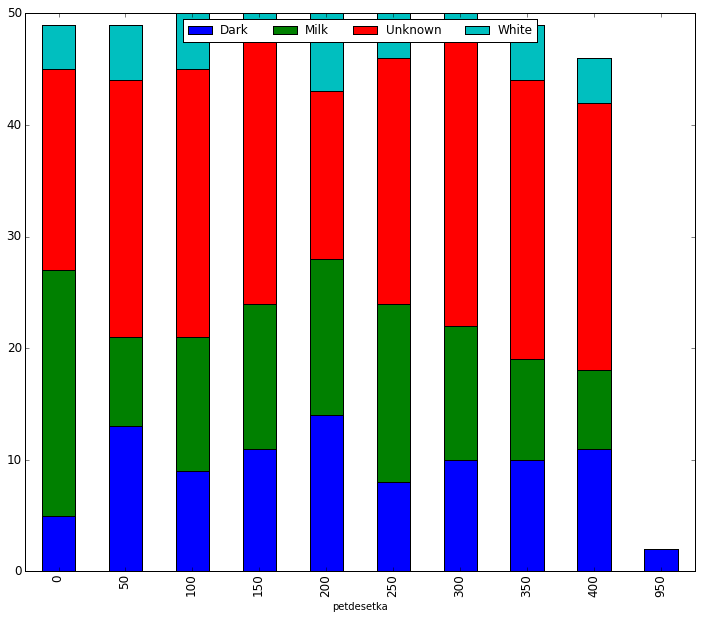

In [21]:
graf_50 = cokolade.groupby(['petdesetka', 'Barva']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 10), fontsize=12)
graf_50.legend(loc=9, ncol=8)

Vidimo, da bistvene razlike ni, je pa res, da bi potrebovali natančno število čokolad (morali bi za vse ugotoviti, kakšne barve so, torej ne bi bilo 'Unknown'). Hipoteza ovržena.

## Ali je različnih proizvajalcev veliko ali malo?
Videli smo že, da je število čokolad posameznega proizvajalca različno. Ali so proizvajalci, ki imajo manj kot 5 čokolad, v manjšini?

In [12]:
bedni_proizvajalci = zastopanost_proizvajalcev[zastopanost_proizvajalcev['Kolicina'] < 5]
bedni_proizvajalci

,Proizvajalec,Kolicina
0,1848,1
1,Alter Eco Bio & Equitable,2
2,Arko Confiserie,1
3,Auchan,3
4,Beletti 1882,1
...,...,...
60,The First Chocolate,2
61,Torras,1
62,U,1
63,Valor Chocolates,1


In [13]:
kul_proizvajalci = zastopanost_proizvajalcev[zastopanost_proizvajalcev['Kolicina'] >= 5]
kul_proizvajalci

,Proizvajalec,Kolicina
6,Bellarom,6
8,Cachet,5
10,Cailler of Switzerland,12
11,Carrefour,13
13,Choceur,14
...,...,...
56,Suchard,7
58,Swiss Dream,5
59,Tablette d'Or,15
64,Villars,7


Vidimo, da je proizvajalcev, ki imajo 5 ali več čokolad, 23, ostalih pa 42, torej je hipoteza potrjena.